## Database Description

The dataset consists of house prices from King County an area in the US State of Washington. The dataset was obtained from [Kaggle.](https://www.kaggle.com/datasets/swathiachath/kc-housesales-data)
The dataset consists of 21 variables and 21613 observations.

* id - a notation for a house
* date - Date house was sold
* price - Price is prediction target
* bedrooms - Number of Bedrooms/House
* bathrooms - Number of bathrooms/bedrooms
* sqftliving - square footage of the home Numeric sqftlot square footage of the lot
* floors - Total floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent.(http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g) 
* grade - overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
* sqftabove - square footage of house apart from basement Numeric sqftbasement square footage of the basement
* yrbuilt - Built Year Numeric yrrenovated Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqftliving15 - Living room area in 2015(implies-- some renovations). This might or might not have affected the lotsize area.
* sqftlot15 - lotSize area in 2015(implies-- some renovations).

**Predict the sales of houses in King County with an accuracy of at least 75-80% and       understand which factors are responsible for higher property value - $650K and above.**

### Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

#### We'll remove all the rows that have null values

In [3]:
df = df.dropna()

### Exploratory Data Analysis

**We'll try to see the distribution of number of houses based on their price**

<AxesSubplot:xlabel='price', ylabel='Count'>

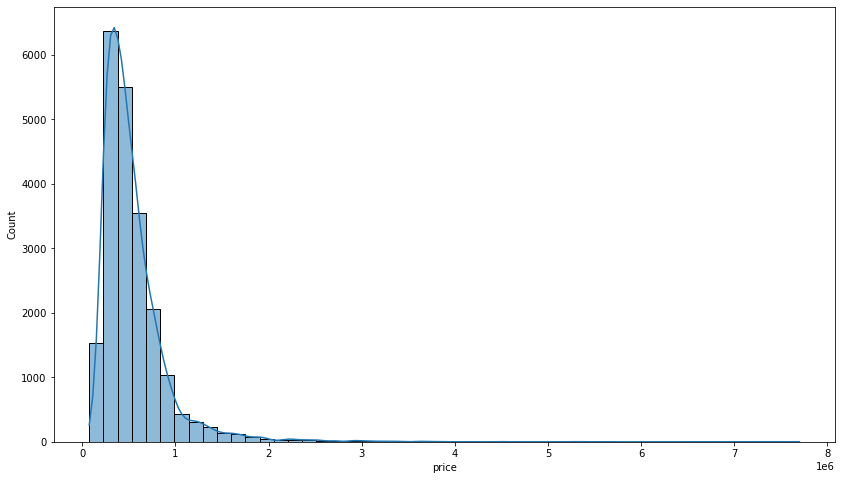

In [6]:
plt.figure(figsize=(14,8))
sns.histplot(df['price'], bins=50, kde=True)

**Looks like most of the houses are in the 0.5 - 1 million dollar price range**

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

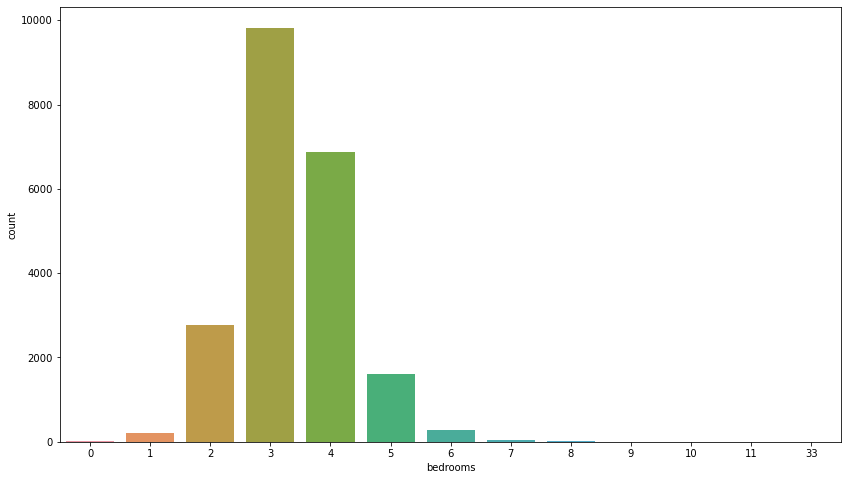

In [5]:
plt.figure(figsize=(14,8))
sns.countplot(x = df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053182
id              -0.016742
long             0.021613
condition        0.036379
yr_built         0.054006
sqft_lot15       0.082448
sqft_lot         0.089661
yr_renovated     0.126436
floors           0.256814
waterfront       0.266371
lat              0.307010
bedrooms         0.308366
sqft_basement    0.323842
view             0.397299
bathrooms        0.525150
sqft_living15    0.585377
sqft_above       0.605567
grade            0.667434
sqft_living      0.702055
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

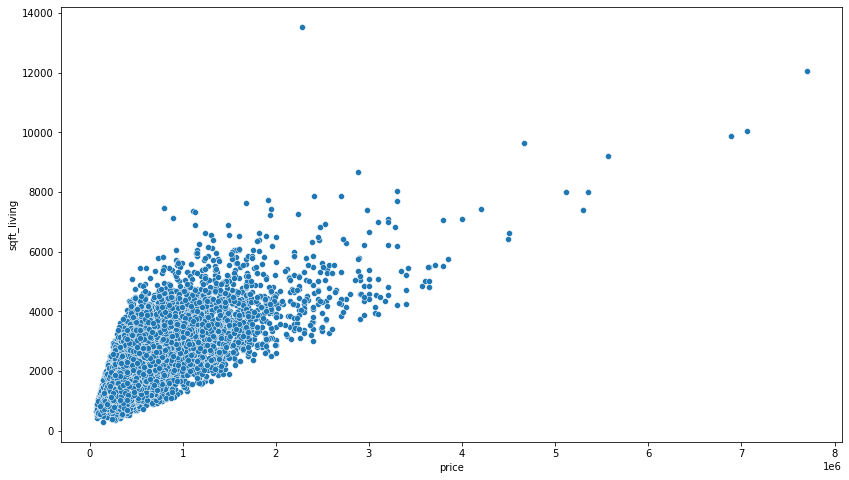

In [8]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

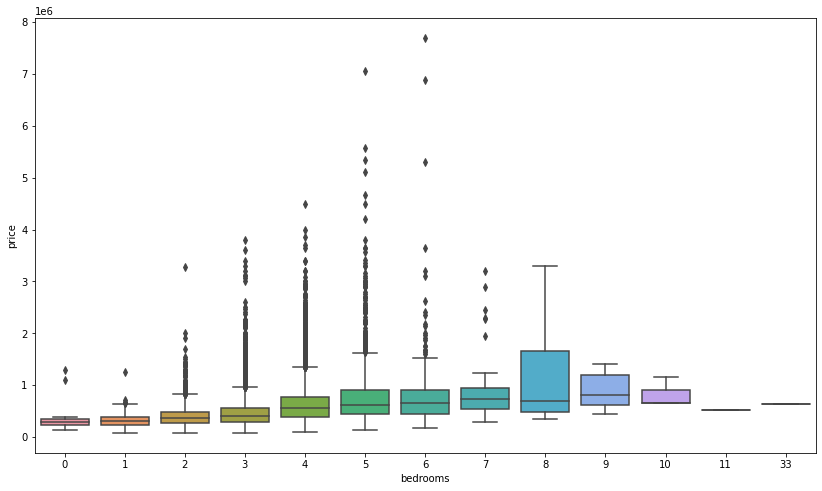

In [9]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

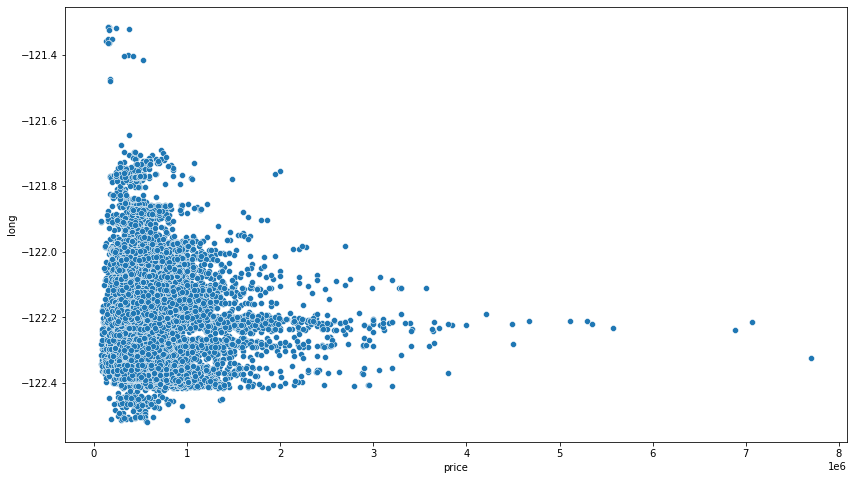

In [9]:
 plt.figure(figsize=(14,8))
sns.scatterplot(x = 'price', y = 'long', data = df)

<AxesSubplot:xlabel='price', ylabel='lat'>

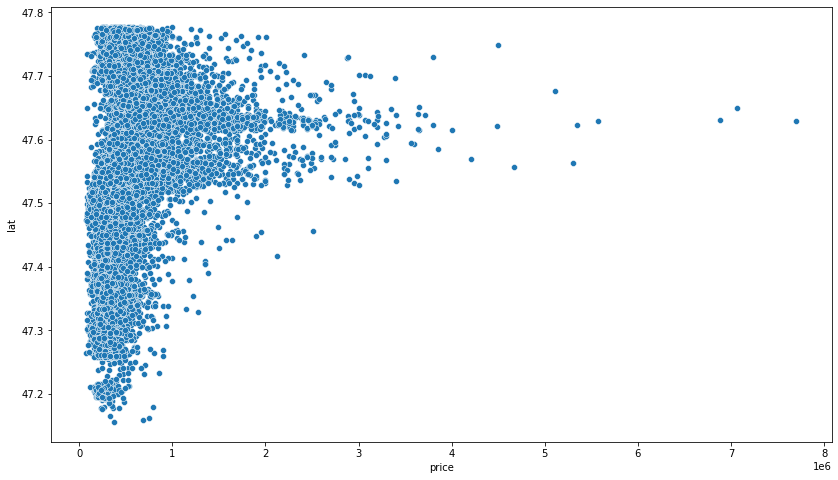

In [10]:
 plt.figure(figsize=(14,8))
sns.scatterplot(x = 'price', y = 'lat', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

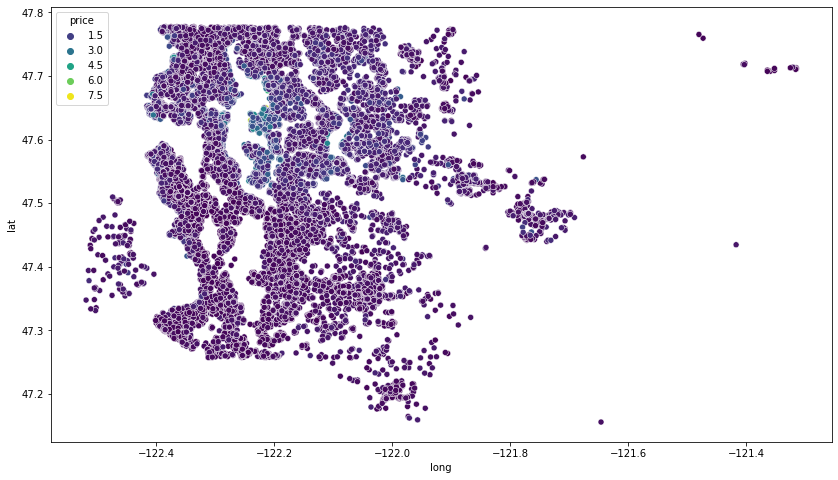

In [11]:
 plt.figure(figsize=(14,8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price', palette = 'viridis')

In [12]:
non_top_1_percentage = df.sort_values('price', ascending = False).iloc[215:]
non_top_1_percentage.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6335,824059321,20140602T000000,1965220.0,4,3.50,4370,8510,2.0,0,1,...,10,3610.0,760,2003,0,98004,47.5876,-122.204,2960,10347
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940.0,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430.0,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050.0,1150,1988,0,98040,47.5632,-122.215,3700,14486
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940.0,1390,1960,0,98040,47.5287,-122.220,3730,16560


<AxesSubplot:xlabel='long', ylabel='lat'>

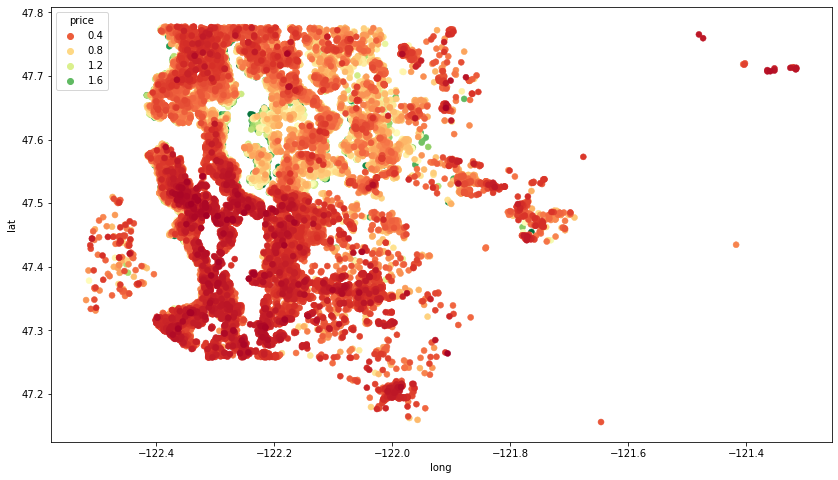

In [13]:
 plt.figure(figsize=(14,8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_percentage, 
                            edgecolor = None, alpha = 1, hue = 'price', palette = 'RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

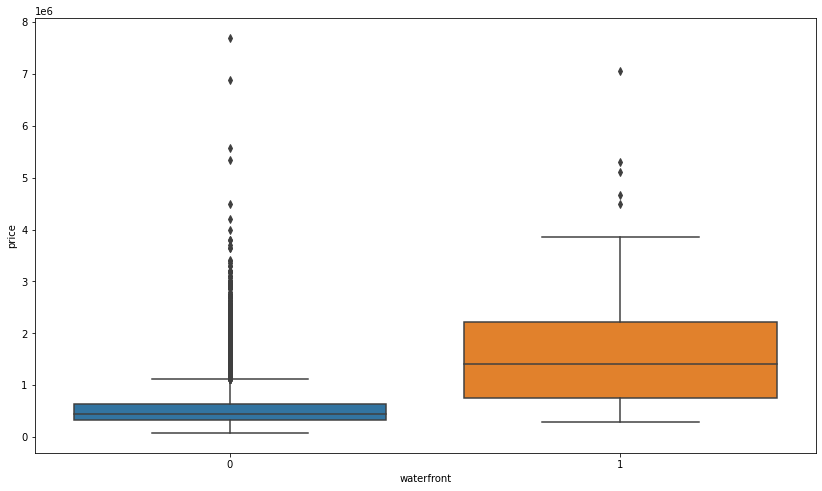

In [14]:
 plt.figure(figsize=(14,8))
sns.boxplot(x = 'waterfront', y = 'price', data = df)

### Feature Engineering Process

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df = df.drop('id', axis = 1)

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21611, dtype: object

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21611, dtype: datetime64[ns]

In [21]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

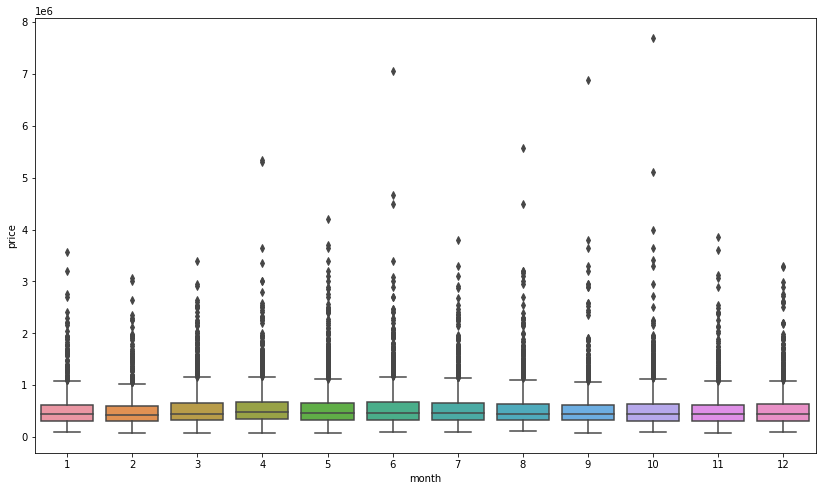

In [23]:
 plt.figure(figsize=(14,8))
sns.boxplot(x = 'month', y = 'price', data = df)

<AxesSubplot:xlabel='month'>

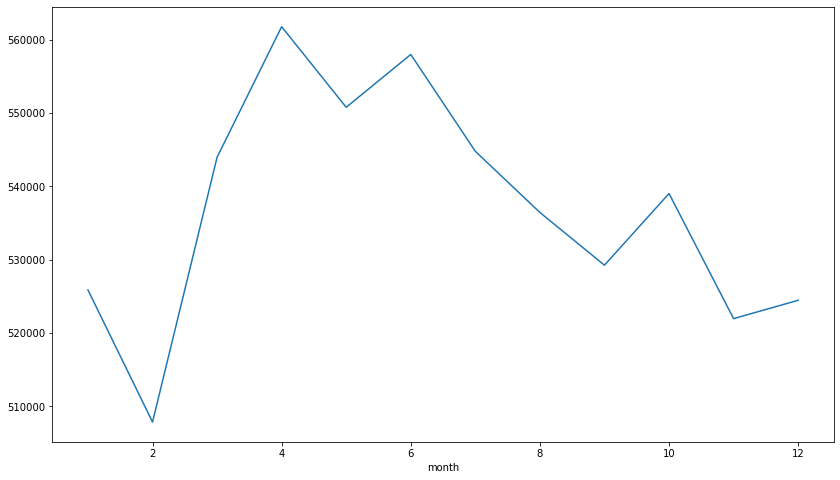

In [24]:
 plt.figure(figsize=(14,8))
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

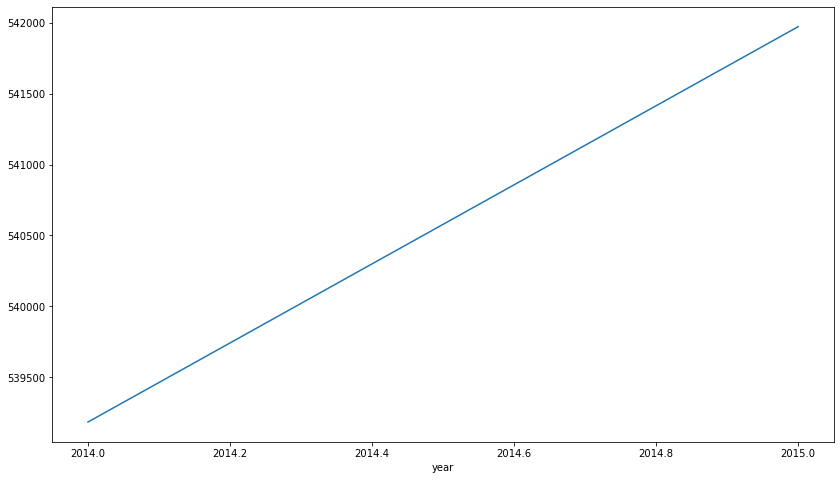

In [25]:
 plt.figure(figsize=(14,8))
df.groupby('year').mean()['price'].plot()

In [26]:
df = df.drop('date', axis = 1)

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [28]:
df['zipcode'].value_counts()

98103    601
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [29]:
df = df.drop('zipcode', axis = 1)

In [30]:
df['yr_renovated'].value_counts()

0       20697
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
df['sqft_basement'].value_counts()

0       13125
600       221
700       218
500       214
800       206
        ...  
588         1
3260        1
243         1
2570        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Data Preprocessing and Training

In [32]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [40]:
X_train.shape

(15127, 19)

In [41]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [42]:
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 426889936896.0000 - val_loss: 425440149504.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 425937928192.0000 - val_loss: 422007570432.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 411707506688.0000 - val_loss: 388315086848.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 338757517312.0000 - val_loss: 267130224640.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 189888741376.0000 - val_loss: 122418159616.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 107583127552.0000 - val_loss: 98506907648.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 100816945152.0000 - val_loss: 96919396352.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 99304177664.0000 - val_loss: 95468265472.0000
Epoch 9/400
119/119 

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32942368768.0000 - val_loss: 33546020864.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32898883584.0000 - val_loss: 33475082240.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32869488640.0000 - val_loss: 33462695936.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32851060736.0000 - val_loss: 33414848512.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32788238336.0000 - val_loss: 33396443136.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32766693376.0000 - val_loss: 33418332160.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32730767360.0000 - val_loss: 33376952320.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32668616704.0000 - val_loss: 33348618240.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 29466042368.0000 - val_loss: 31361636352.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 29414066176.0000 - val_loss: 31371141120.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 29425815552.0000 - val_loss: 31277408256.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 29406928896.0000 - val_loss: 31236513792.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 29358667776.0000 - val_loss: 31218778112.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 29390434304.0000 - val_loss: 31308435456.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 29307568128.0000 - val_loss: 31176456192.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 29323595776.0000 - val_loss: 31224547328.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27139010560.0000 - val_loss: 29789079552.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 27082135552.0000 - val_loss: 29736120320.0000


### Model Evaluation and Prediction

In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 1008x576 with 0 Axes>

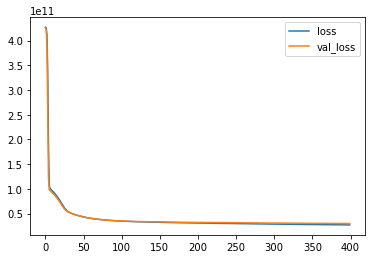

In [50]:
plt.figure(figsize=(14,8))
losses.plot()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [53]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [56]:
np.sqrt(mean_squared_error(y_test, predictions))

172441.64040598995

In [57]:
mean_absolute_error(y_test, predictions)

102978.48406293376

In [59]:
explained_variance_score(y_test, predictions)

0.7767013297505382

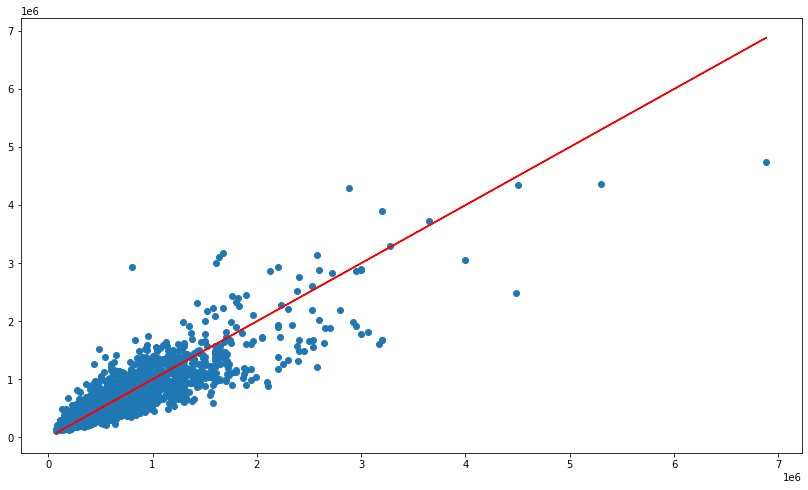

In [60]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [63]:
 single_house = df.drop('price', axis = 1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [65]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [67]:
model.predict(single_house)

1/1 [==============================] - 0s 48ms/step


array([[284817.62]], dtype=float32)

In [68]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2014,10
